In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def spectrum(x):
    S = np.fft.rfft(x.astype(np.float64))
    return np.real(S)**2 + np.imag(S)**2

In [9]:
num_samples   = 1024
sampling_rate = 512
frequency     = 10.0
t = np.arange(num_samples)/float(sampling_rate)
W = 0.1 * np.random.randn(t.size).cumsum()
X = np.sin(2.*np.pi* frequency * t + W)
S_numpy = spectrum(X)

In [10]:
%%timeit
S_numpy = spectrum(X)

The slowest run took 4.65 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 46.7 µs per loop


In [11]:
x_in = tf.placeholder(tf.float64, shape=(None))
spectrum_tf, = tf.py_func(spectrum, [x_in], [tf.float64])

In [12]:
session = tf.InteractiveSession()
S_tf = session.run(spectrum_tf, {x_in: X})

In [13]:
%%timeit
S_tf = session.run(spectrum_tf, {x_in: X})

1000 loops, best of 3: 339 µs per loop


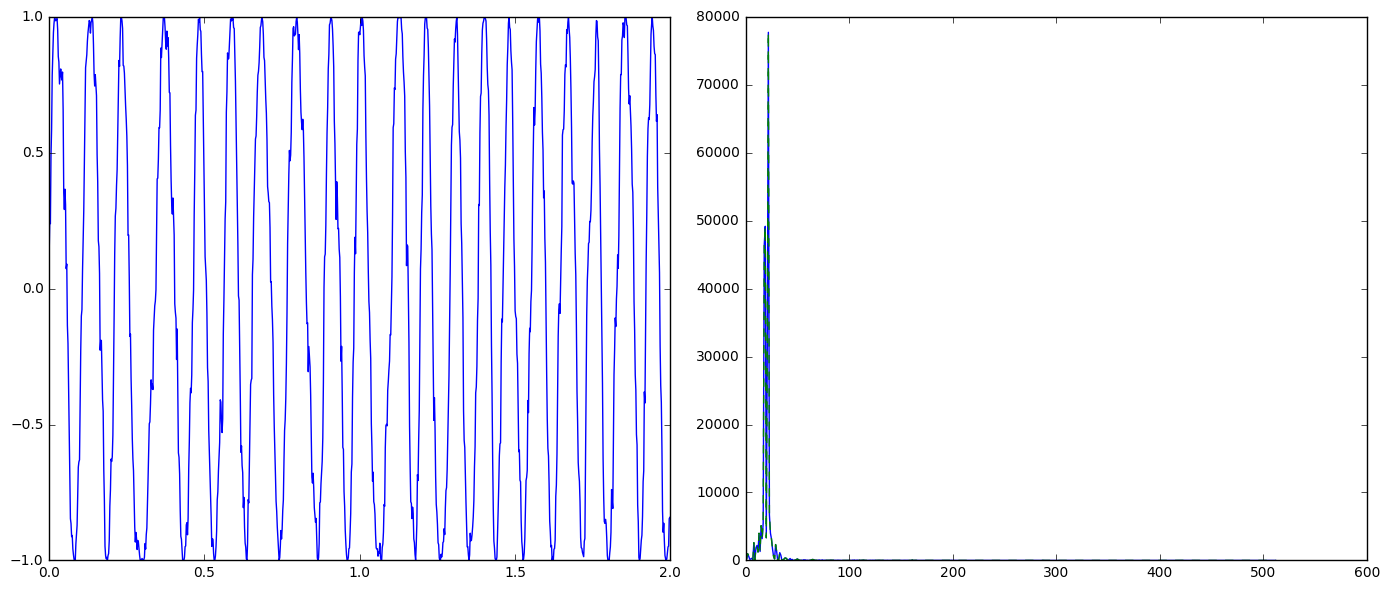

In [14]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.plot(t, X)
plt.subplot(122)
plt.plot(S_tf)
plt.plot(S_numpy, '--')
plt.tight_layout()